<h1 align=center style="background-color:lightblue;"><font size=6>Rent Prices in Manhattan</font></h1>
<h1 align=center><font size=5>Streeteasy Data</font></h1>
<h1 align=center><font size=5>Richard Li, Esther Wu, Chengang Zhang</font></h1>

<h1 align=center style="background-color:lightblue;"><font size=6>Introduction:</font></h1>
<br>
As students of NYU living in New York City, we found this dataset on Manhattan Rental Prices pretty interesting. In this project, we wanted to analyze which features of a Manhattan apartment have the most impact on rent price. 

<br>
First, we wanted to make sense of the data and see what the data tells us about the rental market in Manhattan, specifically in each different neighborhood. The second goal is to see if there is a correlation between the features of each apartment and their market price. Finally, we applied Machine Learning techniques to predict the price of an apartment given certain features.

In [ ]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [ ]:
# reading in the csv file
data = pd.read_csv("manhattan.csv")
data.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [ ]:
# an apatment id along with a list of features of the apartment  
data.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [ ]:
# are there any null values?
data.isnull().sum()

rental_id           0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

From the above, we noticed that there aren't any missing values so we don't need to do much data cleaning.

<br>
The below code just shows the distribution of rent for the apartments in the dataset.

Text(0.5, 0, 'Rent')

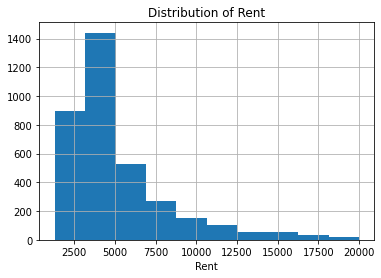

In [ ]:
data['rent'].hist()
plt.title("Distribution of Rent")
plt.xlabel("Rent")

We can see that the rent is between a range from about \$1,300 - \$20,000 with most apartments lying between \$3,000 and \$5,000.

<h1 align=center style="background-color:lightblue;"><font size=6>Data Exploration: </font> <br> <font size=5>Distribution of Rent over Features</font></h1>


<h1 align=center><font size=4>NEIGHBORHOOD AND RENT PRICES</font></h1>


First, we wanted to see how the distribution of rent differed across neighborhoods, which is shown in the following subplots.

In [ ]:
# number of neighborhoods
neighborhood = [i for i in data["neighborhood"].unique()]
len(neighborhood)

32

In [ ]:
# calculating average rent prices
mean = data["rent"].mean()
mean

5138.9403786380335

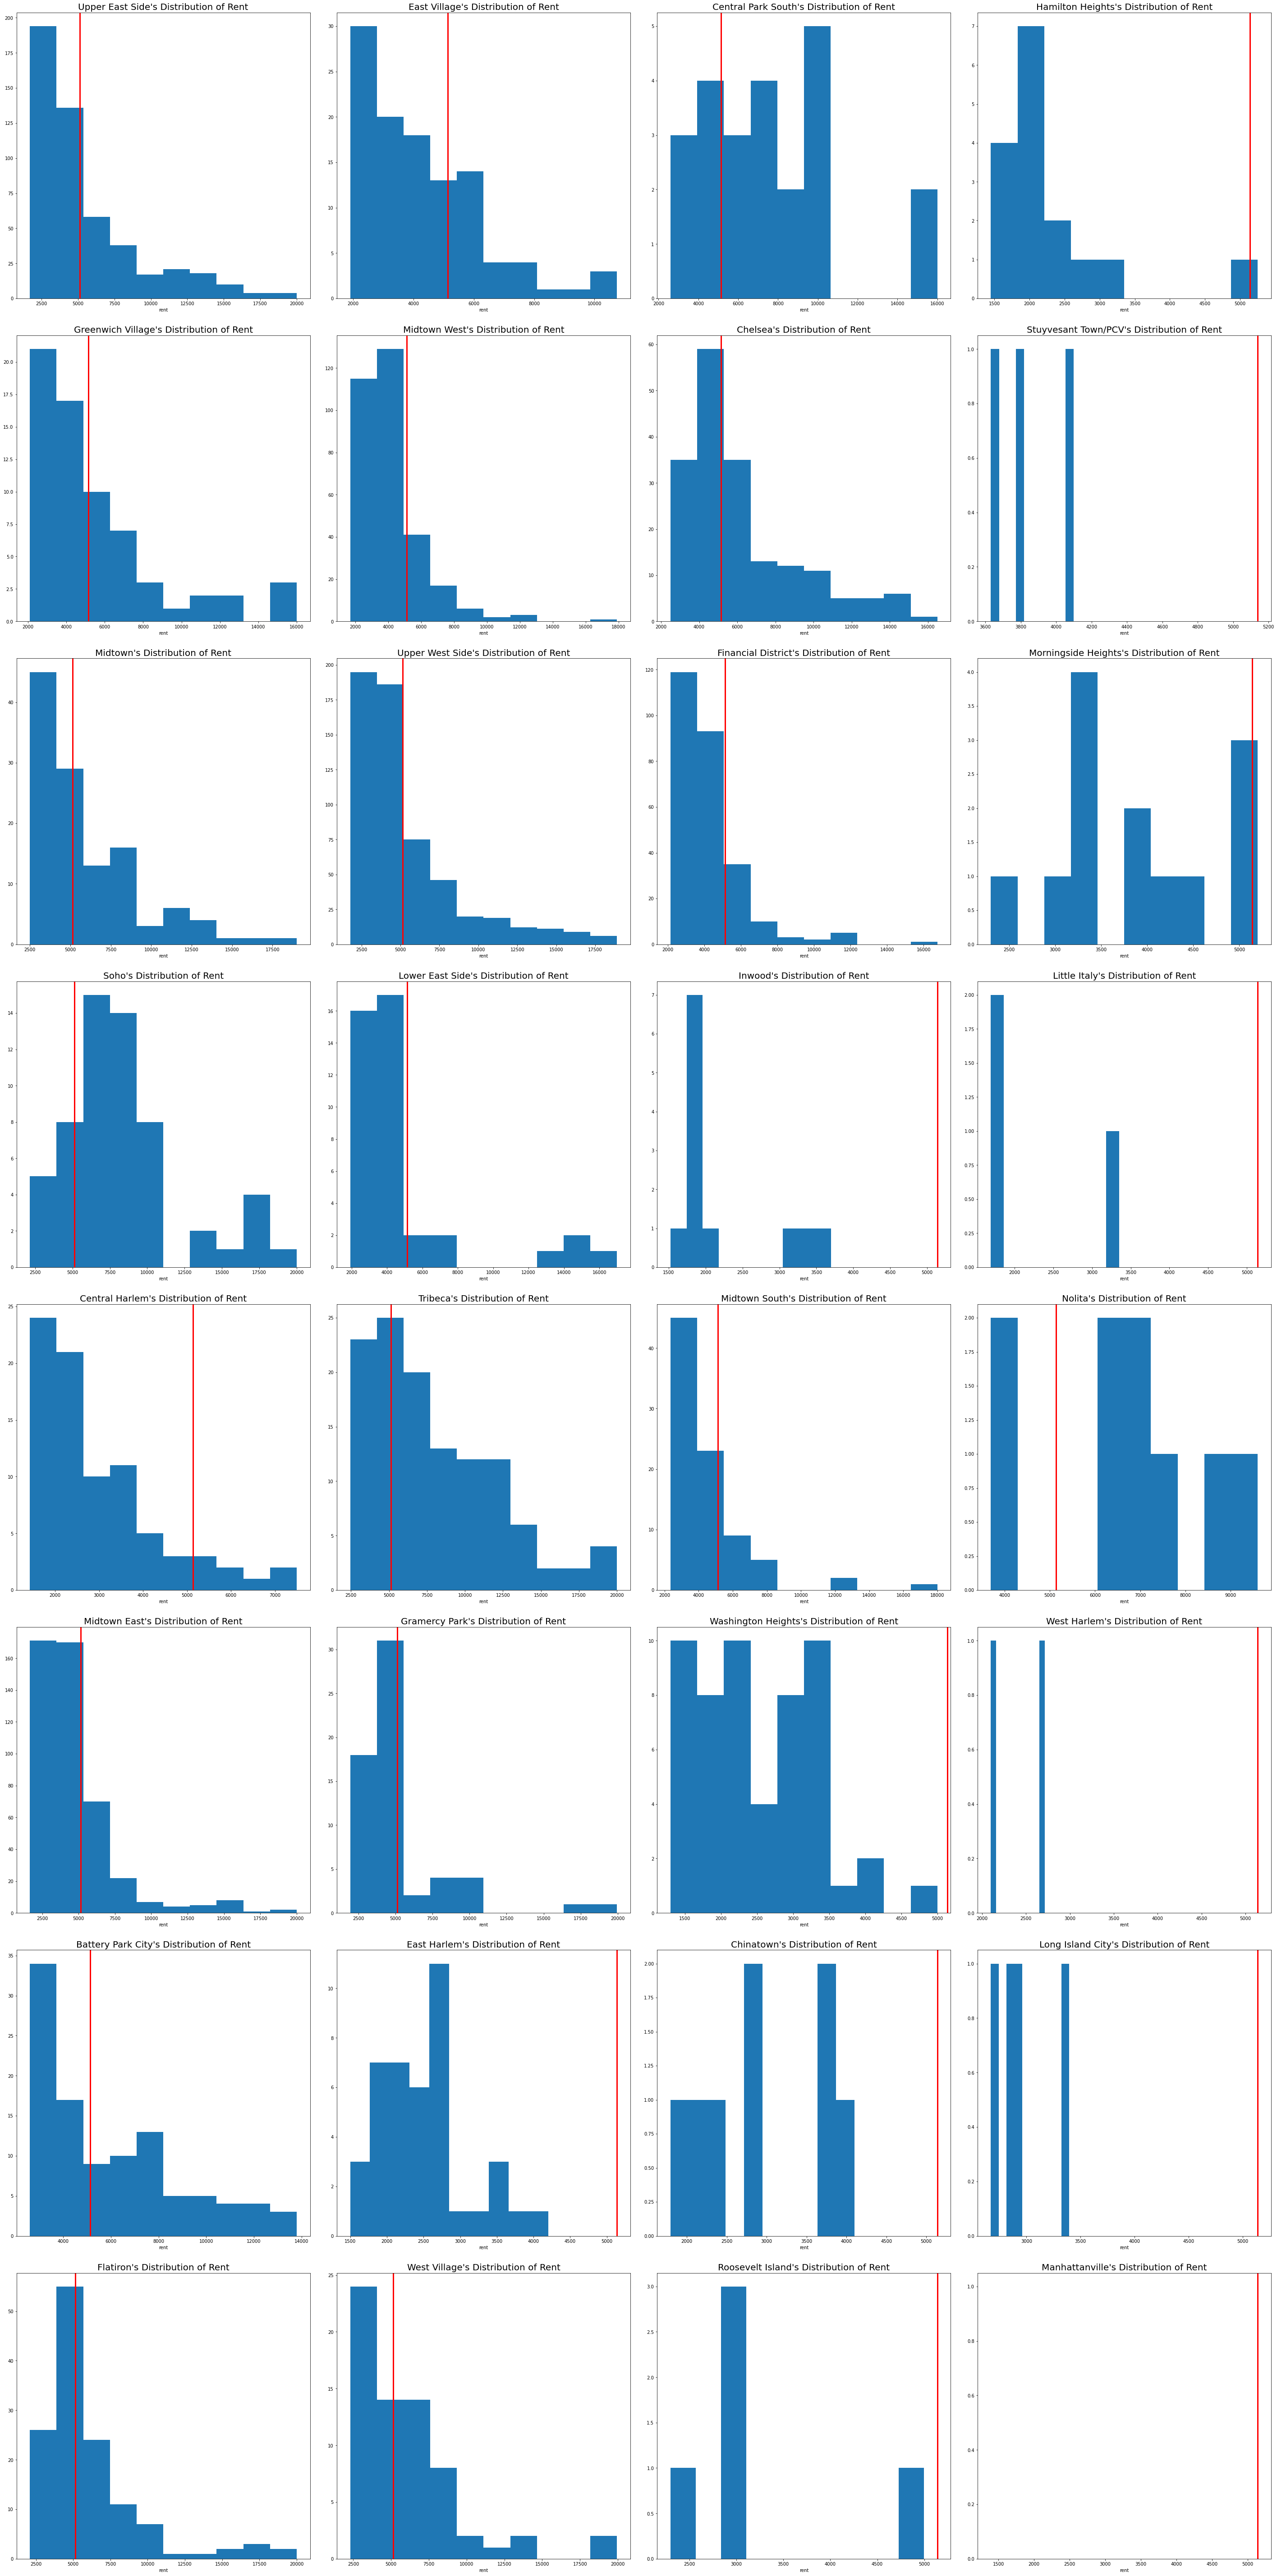

In [ ]:
# creating subplots to plot each neighborhood's graph
fig, ax = plt.subplots(8,4, figsize = (40,80))
ls = [0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7] # the row number of the graph
ls_col = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3] # the col number of the graph

counter = 0

# graphing each job's trend individually
for i in neighborhood:
    # each rent graph grouped by neighborhood
    df = data[data["neighborhood"] == i]
    ax[ls[counter], ls_col[counter]].hist(df["rent"])
    ax[ls[counter], ls_col[counter]].set_title(i + "'s Distribution of Rent", size = 20)
    ax[ls[counter], ls_col[counter]].set_xlabel("rent")
    
    # since there is only one apartment in manhattanville listed, we need to change the xticks

    # plotting a vertical line that represents when the average rent price
    ax[ls[counter], ls_col[counter]].axvline(x = mean, color='red', linestyle='-', linewidth = 3)

    counter+=1

fig.tight_layout(pad = 3)


### Analysis:

The red line in the graphs shows the average rent for the overall dataset as a way to compare the subplots with each other.

We can see that most of the neighborhoods in Manhattan are around the average price of a rental in Manhattan. However Hamilton Heights, Stuyvesant Town/PCV, Morningside Heights, Inwood, Little Italy, West Harlem, East Harlem, Chinatown, Long Island City, and Roosevelt Island are well below the average.<br><br>
<strong>Note:</strong> The last box representing Manhattanville is empty because there is only one apartment listed. The rent is $1395 which is less than the minimum x tick, so we can clearly see it has the cheapest rent.

We also wanted to compare neighborhoods by their rent with different metrics. The graphs below show the neighborhoods ranked by their mean rent, maximum rent, and minimum rent. These graphs will make it easier to compare areas and see which places have the highest rent.

In [ ]:
# seeing average of each neighborhood's rent
rents = data.groupby("neighborhood").rent.mean().reset_index()
rents.sort_values('rent', inplace = True)

# seeing max of each neighborhood's rent
rents_max = data.groupby("neighborhood").rent.max().reset_index()
rents_max.sort_values('rent', inplace = True)

# seeing min of each neighborhood's rent
rents_min = data.groupby("neighborhood").rent.min().reset_index()
rents_min.sort_values('rent', inplace = True)

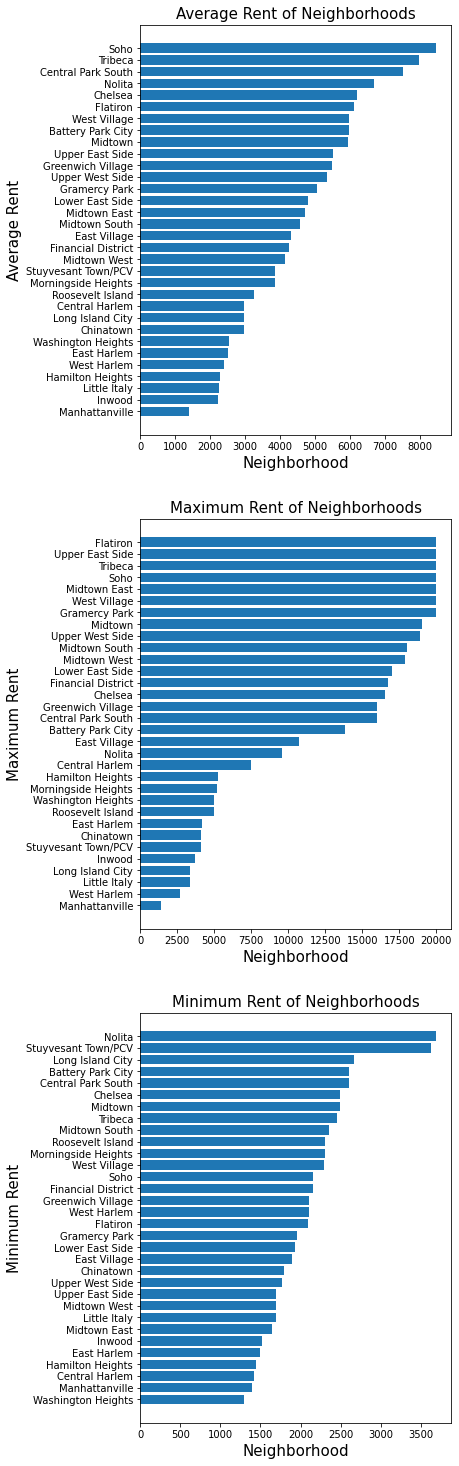

In [ ]:
# checking which neighborhood had the highest rent based on mean, max, min

fig, ax = plt.subplots(3, 1, figsize = (7, 21))

# mean
ax[0].barh(rents["neighborhood"], rents["rent"])
ax[0].set_xlabel("Neighborhood", size = 15)
ax[0].set_ylabel("Average Rent", size = 15)
ax[0].set_title("Average Rent of Neighborhoods", size = 15)
# max
ax[1].barh(rents_max["neighborhood"], rents_max["rent"])
ax[1].set_xlabel("Neighborhood", size = 15)
ax[1].set_ylabel("Maximum Rent", size = 15)
ax[1].set_title("Maximum Rent of Neighborhoods", size = 15)
# min
ax[2].barh(rents_min["neighborhood"], rents_min["rent"])
ax[2].set_xlabel("Neighborhood", size = 15)
ax[2].set_ylabel("Minimum Rent", size = 15)
ax[2].set_title("Minimum Rent of Neighborhoods", size = 15)

fig.tight_layout(pad = 3)

### Summary:
<strong>Top 3 Most Expensive Neighborhoods on Average:</strong><br>
1) Soho<br>
2) Tribeca<br>
3) Central Park South<br><br>

<strong>Top 3 Cheapest Neighborhoods on Average:</strong><br>
1) Manhattanville<br>
2) Inwood<br>
3) Little Italy<br><br>

<strong>Top 3 Neighborhoods with the Highest Maximum Rent:</strong><br>
1) Flatiron<br>
2) Upper East Side<br>
3) Tribeca<br><br>

<strong>Top 3 Most Neighborhoods with the Highest Minimum Rent:</strong><br>
1) Notlita<br>
2) Stuyvesant Town/PCV<br>
3) Long Island City<br>


<h1 align=center><font size=4>FEATURES AND RENT PRICES</font></h1>

Next, we looked at the relationship between rent and the other features.

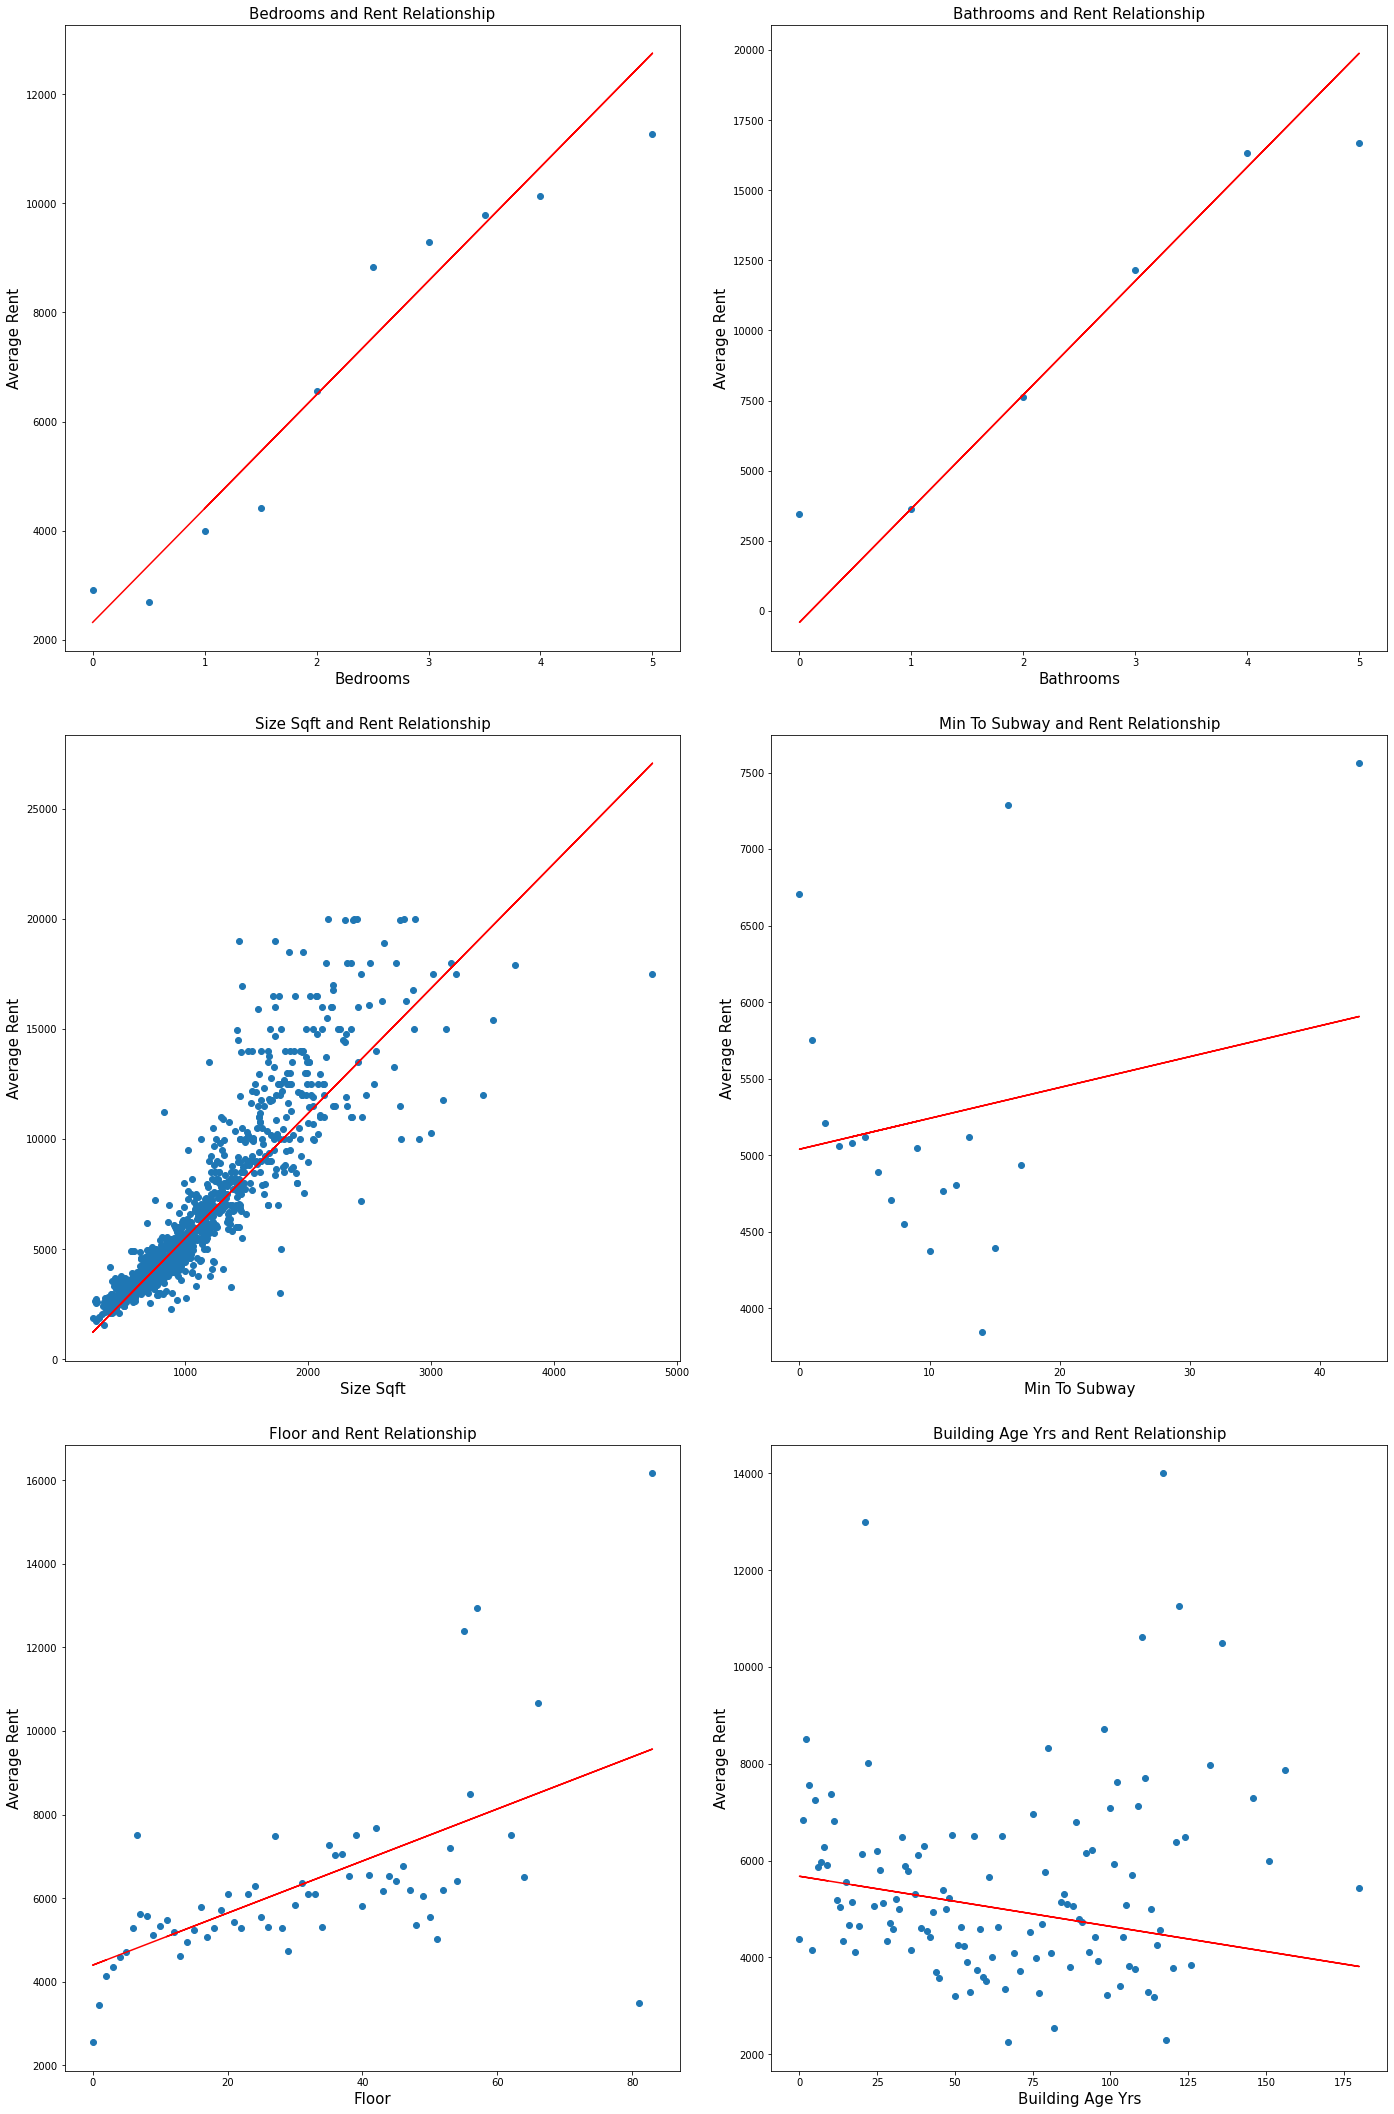

In [ ]:
# looking at the relationship between rent and other features
features = ['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs']

ls = [0, 0, 1, 1, 2, 2]
ls_col = [0, 1, 0, 1, 0, 1]

counter = 0

fig,ax = plt.subplots(3, 2, figsize = (20,30))
for counter, i in enumerate(features):
    df = data.groupby(i).rent.mean().reset_index()
    ax[ls[counter], ls_col[counter]].scatter(df[i], df['rent'])

    # line of best fit
    m, b = np.polyfit(data[i], data['rent'], 1)
    ax[ls[counter], ls_col[counter]].plot(data[i], m*data[i] + b, color = 'red')

    ax[ls[counter], ls_col[counter]].set_title(i.title().replace("_", " ") + ' and Rent Relationship', size=15)
    ax[ls[counter], ls_col[counter]].set_xlabel(i.title().replace("_", " "), size=15)
    ax[ls[counter], ls_col[counter]].set_ylabel("Average Rent", size=15)

    counter+=1

fig.tight_layout(pad = 3)

### Analysis
From the six subplots showing the relationship between various apartment features and the rent price, we can observe a fairly strong correlation in nearly every plot. Specifically, the number of bedrooms, number of bathrooms, apartment size, and floor level is positively correlated with rent price. This makes intuitive sense as the number of bedrooms and bathrooms are indicators of apartment size. Apartments on higher floors also tend to command higher prices due to superior views. Building age, however, is negatively correlated with rent price. This again makes intuitive sense as older buildings have fewer amenities and luxury apartments are mostly newer construction projects. One interesting observation is that minutes to subway has been found to positively correlate with rent price when intuition would suggest the opposite. Delving into the data, we found that there was only a limited sample of apartments further than 20 minutes from the subway and all were at exactly 43 minutes. This suggests incomplete data that could have skewed the results of the plots. When this group of apartments is removed, we can observe a clear negative correlation between minutes to subway and rent price.

<h1 align=center><font size=4>AMENITIES AVAILABLE IN APARTMENTS</font></h1>

We also decided to display the amount of apartments that have certain amenities in pie charts.

In [ ]:
# drop data that isn't the amenities or rent
data_amenities = data.drop(['rental_id', 'bedrooms', 'bathrooms', 'size_sqft',
                            'min_to_subway', 'floor', 'building_age_yrs'], axis = 1, inplace = False)
#data_amenities.head()

In [ ]:
data_amenities.shape #figure out the number of rows
data_amenities1 = data_amenities # make a copy for the range analysis later on


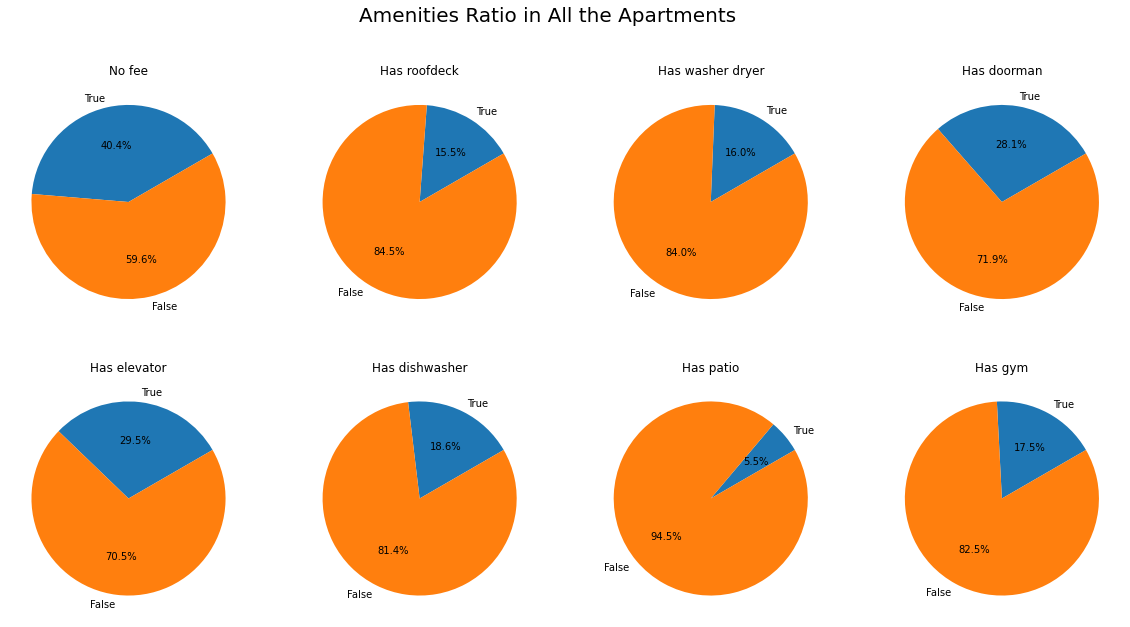

In [ ]:
rows = data_amenities1.shape[0] # first figure out the number of rows

#drop rent as we don't need it for analyzing all the apartments
data_amenities1 = data_amenities.drop(['rent'], axis = 1, inplace = False)

#group by a common feature among all the rows, this gives a sum of values that do that that amenitity
data_amenities1 = data_amenities1.groupby(['borough']).sum()

#figure out the proportion that has that amenity 
data_amenities1[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']] = data_amenities1[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]/rows

#format the subtitles
data_amenities1.columns = data_amenities1.columns.str.replace("_", " ")
data_amenities1.columns = data_amenities1.columns.str.title()

#data_amenities = data_amenities.drop(['rent'], axis = 1, inplace = False)
# transpose data 
data_amenities1 = data_amenities1.T
data_amenities1['False'] = 1 - data_amenities1['Manhattan']
#rename columns true and false for having the amenitity or not having it
data_amenities1.columns = ['True', 'False']

#plot
fig, axes = plt.subplots(2, 4, figsize=(20,10))

for i, (idx, row) in enumerate(data_amenities1.iterrows()):
    ax = axes[i // 4, i % 4]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30,autopct='%1.1f%%')
    ax.set_title(idx.capitalize())

fig.suptitle('Amenities Ratio in All the Apartments', fontsize=20)
fig.subplots_adjust(wspace=.2)

### Summary of Amenities:
<strong>Fees:</strong> 40.4% of all apartments have a fee, while 59.6% do not have a fee <br>
<strong>Roofdeck:</strong> 15.5% of all apartments have roofdecks, while 84.5% do not have roofdecks<br>
<strong>Washer-Dryer:</strong> 16% of all apartments have a washer/dryer, while 84% of all apartments do not have a washer/dryer.<br>
<strong>Doorman:</strong> 28.1% of all apartments have a doorman, while 71.9% of all apartments do not have a doorman<br>
<strong>Elevator:</strong> 29.5% of all apartments have an elevator, while 70.5% of all apartments do not have elevators<br>
<strong>Dishwasher:</strong> 18.6% of all apartments have a dishwasher, while 81.4% of all apartments do not have a dishwasher <br>
<strong>Patio:</strong> 5.5% of all apartments have a patio, while 94.5% of all apartments do not have a patio<br>
<strong>Gym:</strong> 17.5% of all apartments have a gym, while 82.5% of all apartments do not have a gym


<h1 align=center><font size=4>AMENITIES AVAILABLE AT EACH PRICE RANGE</font><br><font size=3>(in increments of $2500)</font></h1> 

The pie charts above tells us the share of apartments that have each individual amenity. However, it doesn't tell us much about what the amenities mean for the price of the apartment. To visualize this we decided to seperate the data into 8 different parts, each of which would cover a range of $2500. This allows us to see what amenities each range of prices have. 

In [ ]:
#creates booleans False = 0 // True = 1
#interval = pd.Interval(left=0, right=2500)

#create dummy values to differentiate ranges of prices
data_amenities[2500] =  data_amenities['rent'].between(0, 2499)
data_amenities[5000] =  data_amenities['rent'].between(2500, 4999)
data_amenities[7500] =  data_amenities['rent'].between(5000, 7499)
data_amenities[10000] =  data_amenities['rent'].between(7500, 9999)
data_amenities[12500] =  data_amenities['rent'].between(10000, 12499)
data_amenities[15000] =  data_amenities['rent'].between(12500, 15499)
data_amenities[17500] =  data_amenities['rent'].between(15000, 17499)
data_amenities[20000] =  data_amenities['rent'].between(17500, 20000)

In [ ]:
# create individual dataframes for each price range
amenities2500 = data_amenities[data_amenities[2500].isin([True])].drop(['rent',5000,7500,10000,12500,15000,17500,20000], axis = 1, inplace = False)
amenities5000 = data_amenities[data_amenities[5000].isin([True])].drop(['rent',2500,7500,10000,12500,15000,17500,20000], axis = 1, inplace = False)
amenities7500 = data_amenities[data_amenities[7500].isin([True])].drop(['rent',2500,5000,10000,12500,15000,17500,20000], axis = 1, inplace = False)
amenities10000 = data_amenities[data_amenities[10000].isin([True])].drop(['rent',2500,5000,7500,12500,15000,17500,20000], axis = 1, inplace = False)
amenities12500 = data_amenities[data_amenities[12500].isin([True])].drop(['rent',2500,5000,7500,10000,15000,17500,20000], axis = 1, inplace = False)
amenities15000 = data_amenities[data_amenities[15000].isin([True])].drop(['rent',2500,5000,7500,10000,12500,17500,20000], axis = 1, inplace = False)
amenities17500 = data_amenities[data_amenities[17500].isin([True])].drop(['rent',2500,5000,7500,10000,12500,15000,20000], axis = 1, inplace = False)
amenities20000 = data_amenities[data_amenities[20000].isin([True])].drop(['rent',2500,5000,7500,10000,12500,15000,17500], axis = 1, inplace = False)

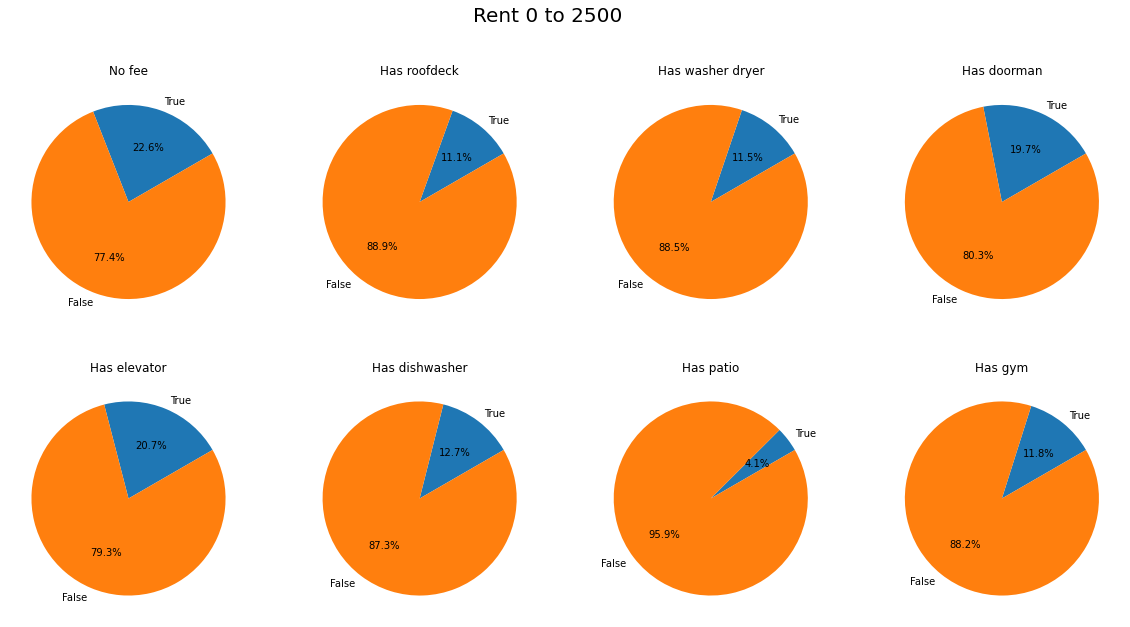

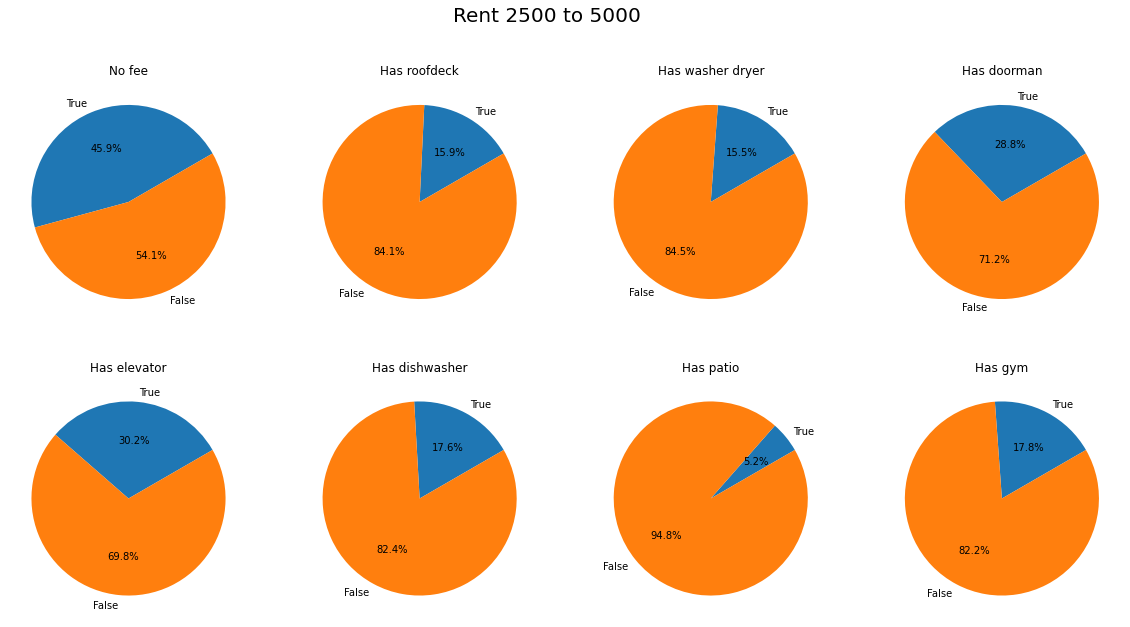

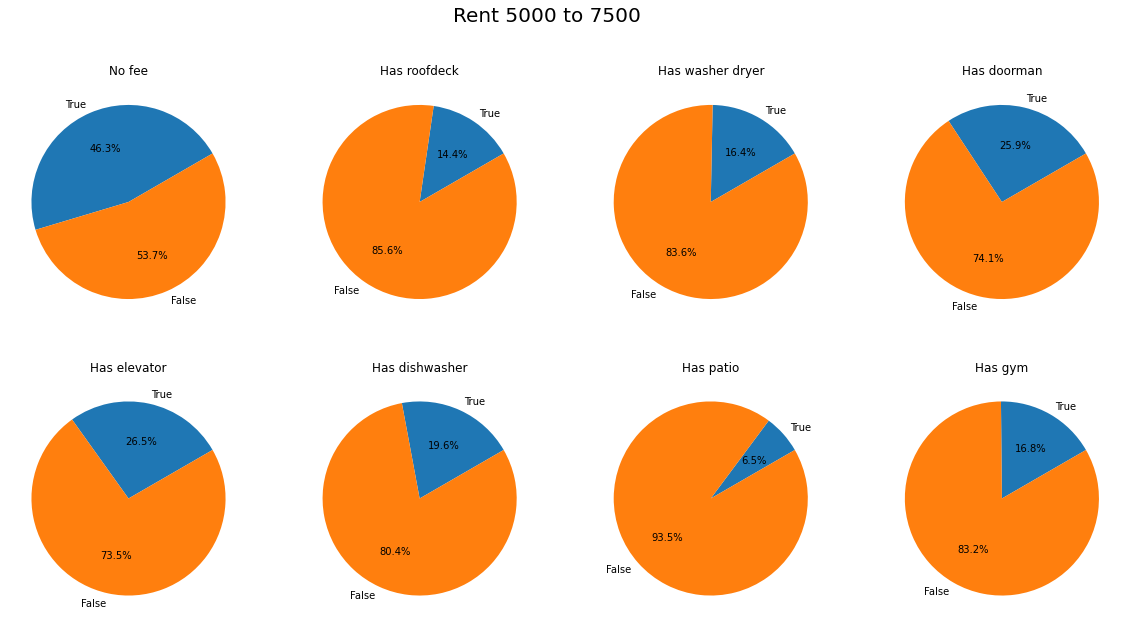

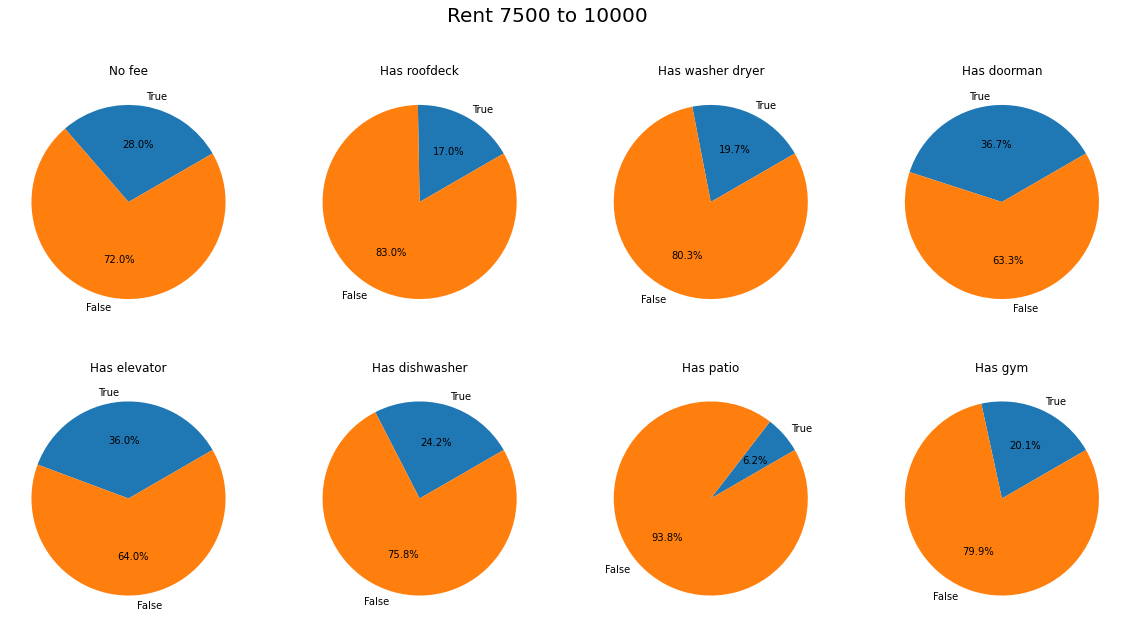

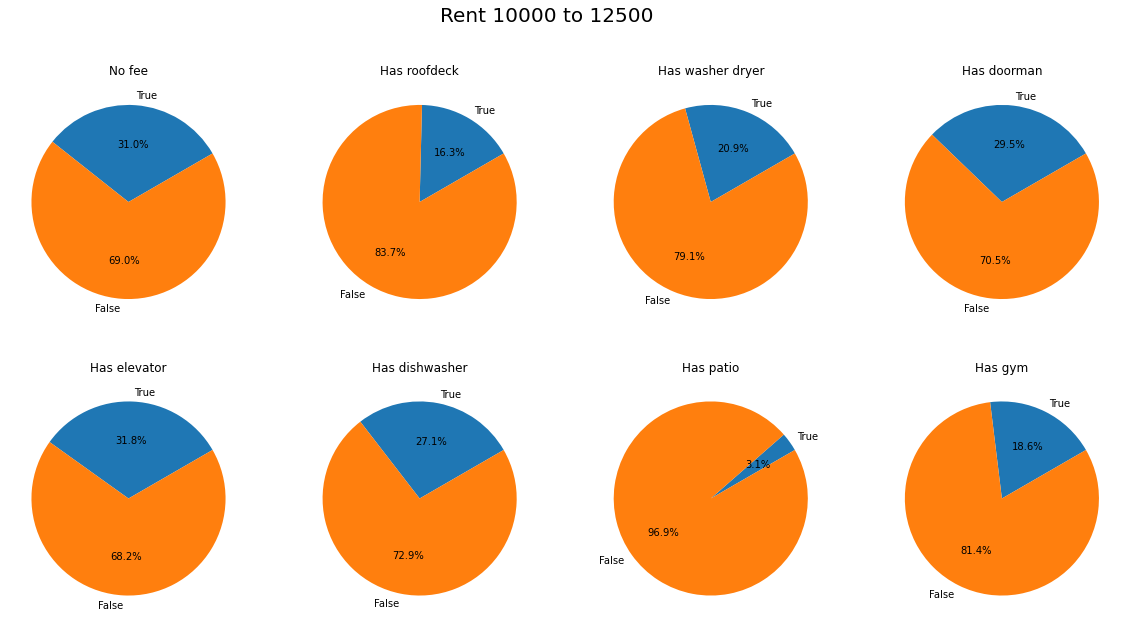

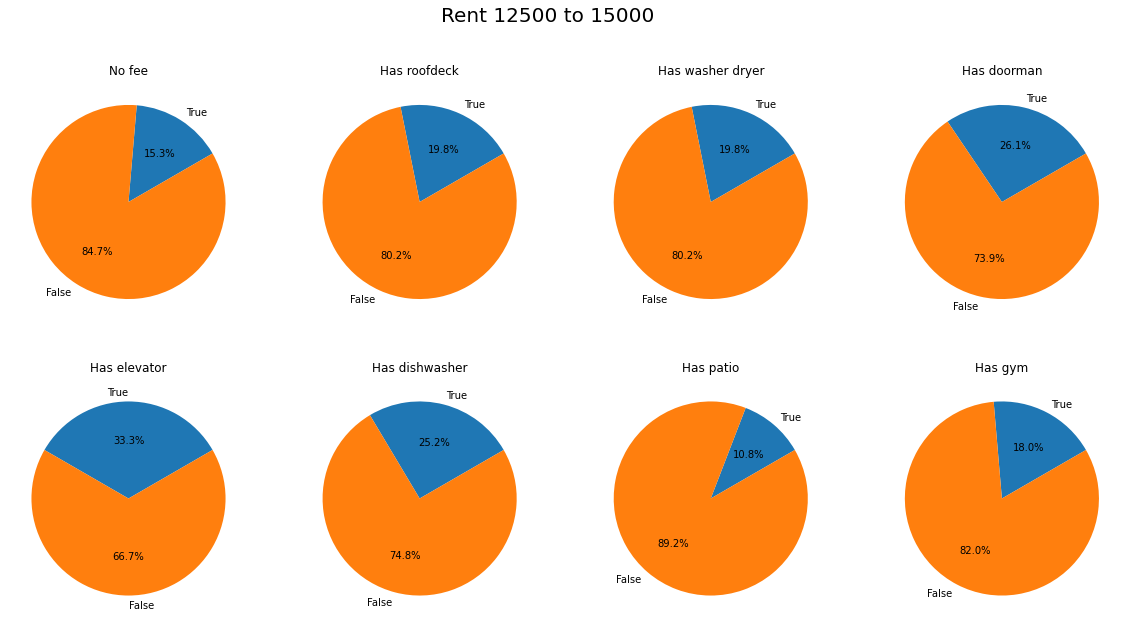

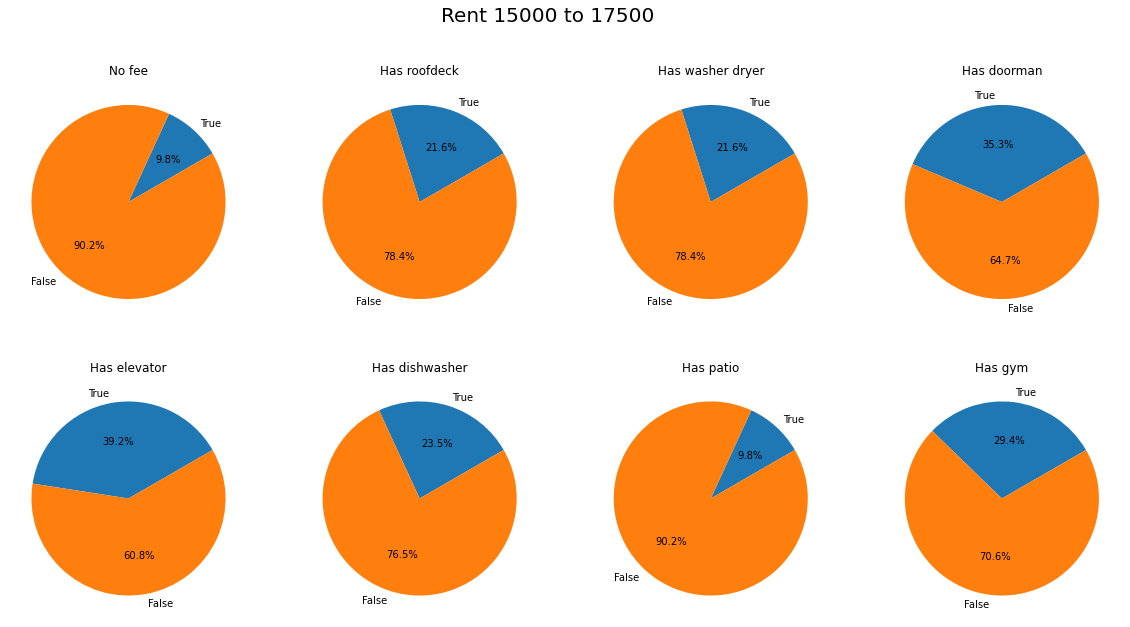

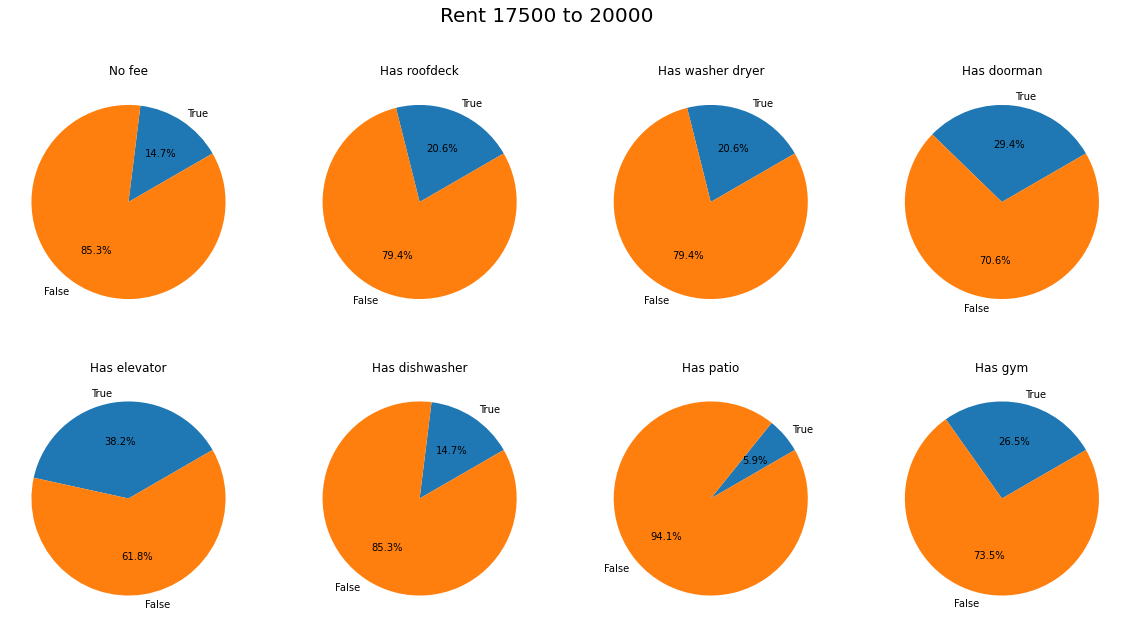

In [ ]:
#rent prices 0 - 2500
rows = amenities2500.shape[0]
amenities2500 = amenities2500.groupby([2500]).sum()
amenities2500[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']] = amenities2500[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]/rows
amenities2500.columns = amenities2500.columns.str.replace("_", " ")
amenities2500 = amenities2500.T
amenities2500[False] = 1 - amenities2500[True]

fig, axes = plt.subplots(2, 4, figsize=(20,10))

for i, (idx, row) in enumerate(amenities2500.iterrows()):
    ax = axes[i // 4, i % 4]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30,autopct='%1.1f%%')
    ax.set_title(idx.capitalize())

fig.suptitle('Rent 0 to 2500', fontsize=20)
fig.subplots_adjust(wspace=.2)

#-----------------------------------------------------------------------------------------#
#rent prices 2500 - 5000
rows = amenities5000.shape[0]
amenities5000 = amenities5000.groupby([5000]).sum()
amenities5000[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']] = amenities5000[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]/rows
amenities5000.columns = amenities5000.columns.str.replace("_", " ")
amenities5000 = amenities5000.T
amenities5000[False] = 1 - amenities5000[True]

fig, axes = plt.subplots(2, 4, figsize=(20,10))

for i, (idx, row) in enumerate(amenities5000.iterrows()):
    ax = axes[i // 4, i % 4]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30,autopct='%1.1f%%')
    ax.set_title(idx.capitalize())

fig.suptitle('Rent 2500 to 5000', fontsize=20)
fig.subplots_adjust(wspace=.2)

#-----------------------------------------------------------------------------------------#
#rent prices 5000-7500
rows = amenities7500.shape[0]
amenities7500 = amenities7500.groupby([7500]).sum()
amenities7500[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']] = amenities7500[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]/rows
amenities7500.columns = amenities7500.columns.str.replace("_", " ")
amenities7500 = amenities7500.T
amenities7500[False] = 1 - amenities7500[True]

fig, axes = plt.subplots(2, 4, figsize=(20,10))

for i, (idx, row) in enumerate(amenities7500.iterrows()):
    ax = axes[i // 4, i % 4]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30,autopct='%1.1f%%')
    ax.set_title(idx.capitalize())

fig.suptitle('Rent 5000 to 7500', fontsize=20)
fig.subplots_adjust(wspace=.2)
#-----------------------------------------------------------------------------------------#
#rent prices 7500 - 10000
rows = amenities10000.shape[0]
amenities10000 = amenities10000.groupby([10000]).sum()
amenities10000[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']] = amenities10000[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]/rows
amenities10000.columns = amenities10000.columns.str.replace("_", " ")
amenities10000 = amenities10000.T
amenities10000[False] = 1 - amenities10000[True]

fig, axes = plt.subplots(2, 4, figsize=(20,10))

for i, (idx, row) in enumerate(amenities10000.iterrows()):
    ax = axes[i // 4, i % 4]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30,autopct='%1.1f%%')
    ax.set_title(idx.capitalize())

fig.suptitle('Rent 7500 to 10000', fontsize=20)
fig.subplots_adjust(wspace=.2)
#-----------------------------------------------------------------------------------------#
#rent prices 10000 - 12500
rows = amenities12500.shape[0]
amenities12500 = amenities12500.groupby([12500]).sum()
amenities12500[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']] = amenities12500[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]/rows
amenities12500.columns = amenities12500.columns.str.replace("_", " ")
amenities12500 = amenities12500.T
amenities12500[False] = 1 - amenities12500[True]

fig, axes = plt.subplots(2, 4, figsize=(20,10))

for i, (idx, row) in enumerate(amenities12500.iterrows()):
    ax = axes[i // 4, i % 4]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30,autopct='%1.1f%%')
    ax.set_title(idx.capitalize())

fig.suptitle('Rent 10000 to 12500', fontsize=20)
fig.subplots_adjust(wspace=.2)
#-----------------------------------------------------------------------------------------#
#rent prices 12500 - 15000
rows = amenities15000.shape[0]
amenities15000 = amenities15000.groupby([15000]).sum()
amenities15000[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']] = amenities15000[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]/rows
amenities15000.columns = amenities15000.columns.str.replace("_", " ")
amenities15000 = amenities15000.T
amenities15000[False] = 1 - amenities15000[True]

fig, axes = plt.subplots(2, 4, figsize=(20,10))

for i, (idx, row) in enumerate(amenities15000.iterrows()):
    ax = axes[i // 4, i % 4]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30,autopct='%1.1f%%')
    ax.set_title(idx.capitalize())

fig.suptitle('Rent 12500 to 15000', fontsize=20)
fig.subplots_adjust(wspace=.2)
#-----------------------------------------------------------------------------------------#
#rent prices 15000 - 17500
rows = amenities17500.shape[0]
amenities17500 = amenities17500.groupby([17500]).sum()
amenities17500[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']] = amenities17500[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]/rows
amenities17500.columns = amenities17500.columns.str.replace("_", " ")
amenities17500 = amenities17500.T
amenities17500[False] = 1 - amenities17500[True]

fig, axes = plt.subplots(2, 4, figsize=(20,10))

for i, (idx, row) in enumerate(amenities17500.iterrows()):
    ax = axes[i // 4, i % 4]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30,autopct='%1.1f%%')
    ax.set_title(idx.capitalize())

fig.suptitle('Rent 15000 to 17500', fontsize=20)
fig.subplots_adjust(wspace=.2)
#-----------------------------------------------------------------------------------------#
#rent price 17500 - 20000
rows = amenities20000.shape[0]
amenities20000 = amenities20000.groupby([20000]).sum()
amenities20000[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']] = amenities20000[['no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman',
       'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]/rows
amenities20000.columns = amenities20000.columns.str.replace("_", " ")
amenities20000 = amenities20000.T
amenities20000[False] = 1 - amenities20000[True]

fig, axes = plt.subplots(2, 4, figsize=(20,10))

for i, (idx, row) in enumerate(amenities20000.iterrows()):
    ax = axes[i // 4, i % 4]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30,autopct='%1.1f%%')
    ax.set_title(idx.capitalize())

fig.suptitle('Rent 17500 to 20000', fontsize=20)
fig.subplots_adjust(wspace=.2)

### Analysis of amenities at different price levels: 

 In general, the amenities that the apartments offer at different price ranges are similar. However, there are some exceptions to this rule. Most notably, the apartments that have a rent price between 2500-5000 and 5000-7500 are less likely to have a fee (45.9% and 46.3% do not have a fee) when compared to apartments at a higher price level (14.7% of apartments with a rent between 17500 and 20000 do not have a fee) and apartments at a lower price level (22.6% of apartments with a rent between 0 and 2500 do not have a fee). <br>

However, since in general most of the apartments have similar amenities regardless of rent price, we can safely exclude amenities when trying to predict the rent.

<h1 align=center style="background-color:lightblue;"><font size=6>Looking at correlation between features </font></h1>

<h1 align=left><font size=4>Correlation between neighborhoods and rent price</font></h1>

In [ ]:
neigh_dummies = data
Neighborhood = pd.get_dummies(neigh_dummies.neighborhood)
neigh_dummies = neigh_dummies.join(Neighborhood)
neigh_dummies.drop(['neighborhood'], axis=1, inplace=True)

In [ ]:
neigh_dummies.drop(['rental_id','bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'borough'], axis = 1, inplace = True)

In [ ]:
# seeing which neighborhood affects the rent most
corrMatrix = neigh_dummies.corr()
correlation_neigh = pd.DataFrame(corrMatrix)['rent']
correlation_neigh.sort_values(ascending = False)


rent                   1.000000
Tribeca                0.167302
Soho                   0.135870
Chelsea                0.077644
Flatiron               0.061074
Central Park South     0.060563
Upper East Side        0.048749
Midtown                0.046701
Battery Park City      0.045670
West Village           0.036549
Upper West Side        0.030084
Nolita                 0.024721
Greenwich Village      0.014494
Gramercy Park         -0.003091
Stuyvesant Town/PCV   -0.011900
Lower East Side       -0.012111
Manhattanville        -0.019904
West Harlem           -0.020550
Roosevelt Island      -0.022361
Long Island City      -0.023209
Morningside Heights   -0.024933
Little Italy          -0.026627
Midtown South         -0.028899
Chinatown             -0.032862
East Village          -0.046823
Midtown East          -0.053198
Inwood                -0.053870
Hamilton Heights      -0.060840
Financial District    -0.079201
East Harlem           -0.090275
Midtown West          -0.099947
Washingt

From this, we can see that apartments in Tribeca or Central Harlem have rent that is most influenced by the neighborhood.

<h1 align=left><font size=4>Correlation between features and rent</font></h1>

We then looked at the correlation between rent and all the other non-categorical features through a heatmap.

Text(0.5, 0.98, 'Correlation Matrix of Features')

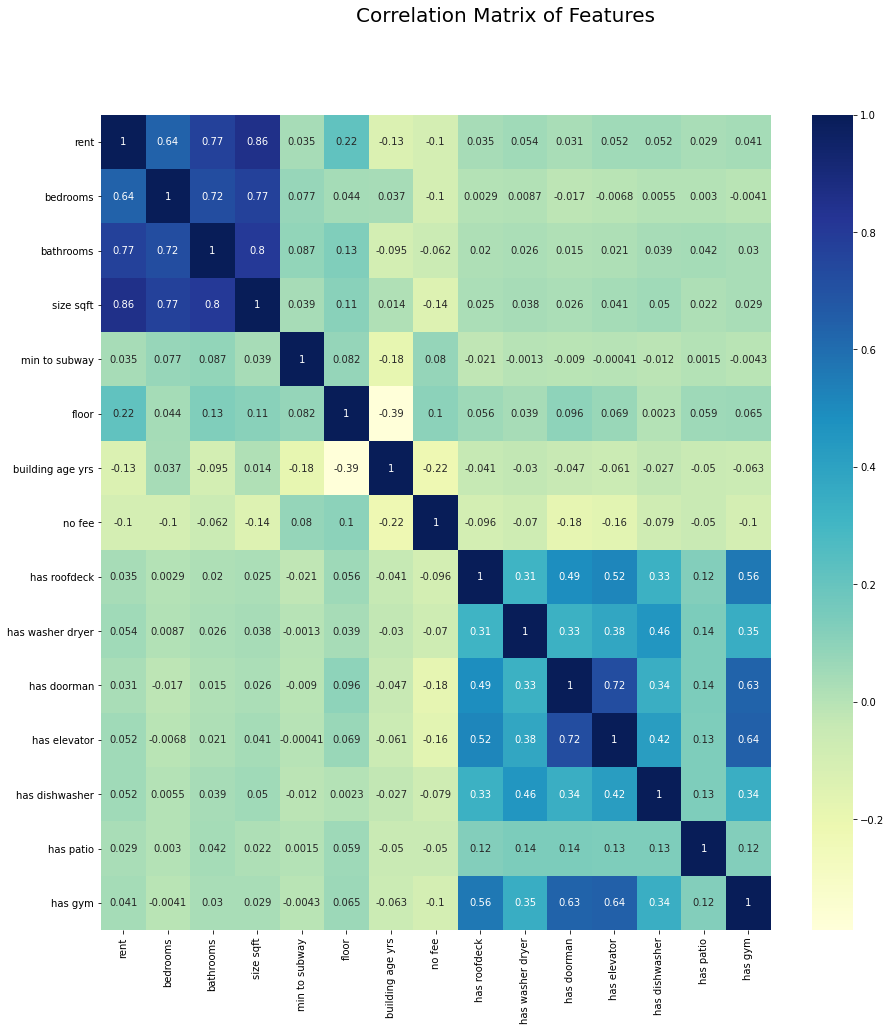

In [ ]:
# creating the heatmap
all_corr = data.drop(['rental_id'], axis = 1, inplace = False)
all_corr.columns = all_corr.columns.str.replace("_"," ")
corrMatrix = all_corr.corr()
#print (corrMatrix)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, cmap="YlGnBu",annot=True, ax=ax)

fig.suptitle('Correlation Matrix of Features', fontsize = 20)

<strong>Note:</strong> Only need to look at either the first row or first column to see the features' correlation with rent.

### Analysis: 

From our heatmap above, we can see that features such as the number of bedrooms (0.64), number of bathrooms (0.77), and the size of the apartment(0.86) have a greater correlation to rent prices compared to the amenities that the apartment offers (which all do not exceed a correlation coefficient of 0.1). This means when we need to make predictions, we can disregard these features. The greatest correlation is visible in number of bedrooms, bathrooms, size, and floor level, so these are definitely more important in determining rent prices. 

<h1 align=center style="background-color:lightblue;"><font size=6>Predicting Rent Based on Features</font></h1>

We decided to implement machine learning in order to see if we can predict rent prices from inputted features.


<h1 align=left><font size=4>Split Train Test</font></h1>

First, we created our independent and dependent datasets.

In [ ]:
# creating independent and dependent variable graphs
# dropping all amenities and categorical features, along with rent for independent data
x = data.drop(['rental_id', 'neighborhood', 'rent', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'], axis = 1)
# dependent dataset
y = data["rent"]

In [ ]:
# splitting data into train and test sets to help with predictions
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.8, random_state=42)


<h1 align=left><font size=4>Checking which model performs best on our data</font><br><font size=3>Linear Regression:</font></h1>

In [ ]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print('Linear regression train score:', model.score(x_train, y_train))

Linear regression train score: 0.7861057576977293


<h1 align=left><font size=3>K-Nearest Neighbors:</font></h1>

In [ ]:
# knn
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.model_selection import cross_val_score

In [ ]:
reg_knn = knn().fit(x_train, y_train)
# performance of KNN for classification
print("KNN train score:", cross_val_score(knn(n_neighbors=100),X=x_train,y=y_train,cv=5).mean())

KNN train score: 0.7720819168409007


<h1 align=left><font size=3>Random Forest Regressor:</font></h1>

In [ ]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
# random_state = 0 to get the same result each time we run this
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0, max_depth=7)
# performance of using Random Forest for classification
print("Random Forest score:", cross_val_score(regressor,x_train,y_train,cv=5).mean())

Random Forest score: 0.8141766400031164


### Analysis:
We can see the best model to use to predict for these features is the random forest regressor. It has the highest score, so it provides the most accurate predictions.

In [ ]:
# fitting Random Forest Regressor on our data
regressor.fit(x_train, y_train)
# predictions
y_predict = regressor.predict(x_test)

In [ ]:
# comparing y_predict w our y_test
predictions = pd.DataFrame({'Y_predict': y_predict, 'Y_test': y_test})
predictions

,Y_predict,Y_test
712,5212.344288,3500
279,4645.573680,4730
1456,3825.801365,4915
3503,4189.014357,3850
2194,3652.768328,3840
...,...,...
2624,3813.011057,4795
2073,2242.669733,1500
1356,2927.705276,2945
1146,3244.089789,4350


In the subplots below, we visualize our predictions made with these models and the relationships the random forest regression model predicted between rent and the top 5 features: size of apartment, number of bathrooms and bedrooms, the floor it is on, and building age.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

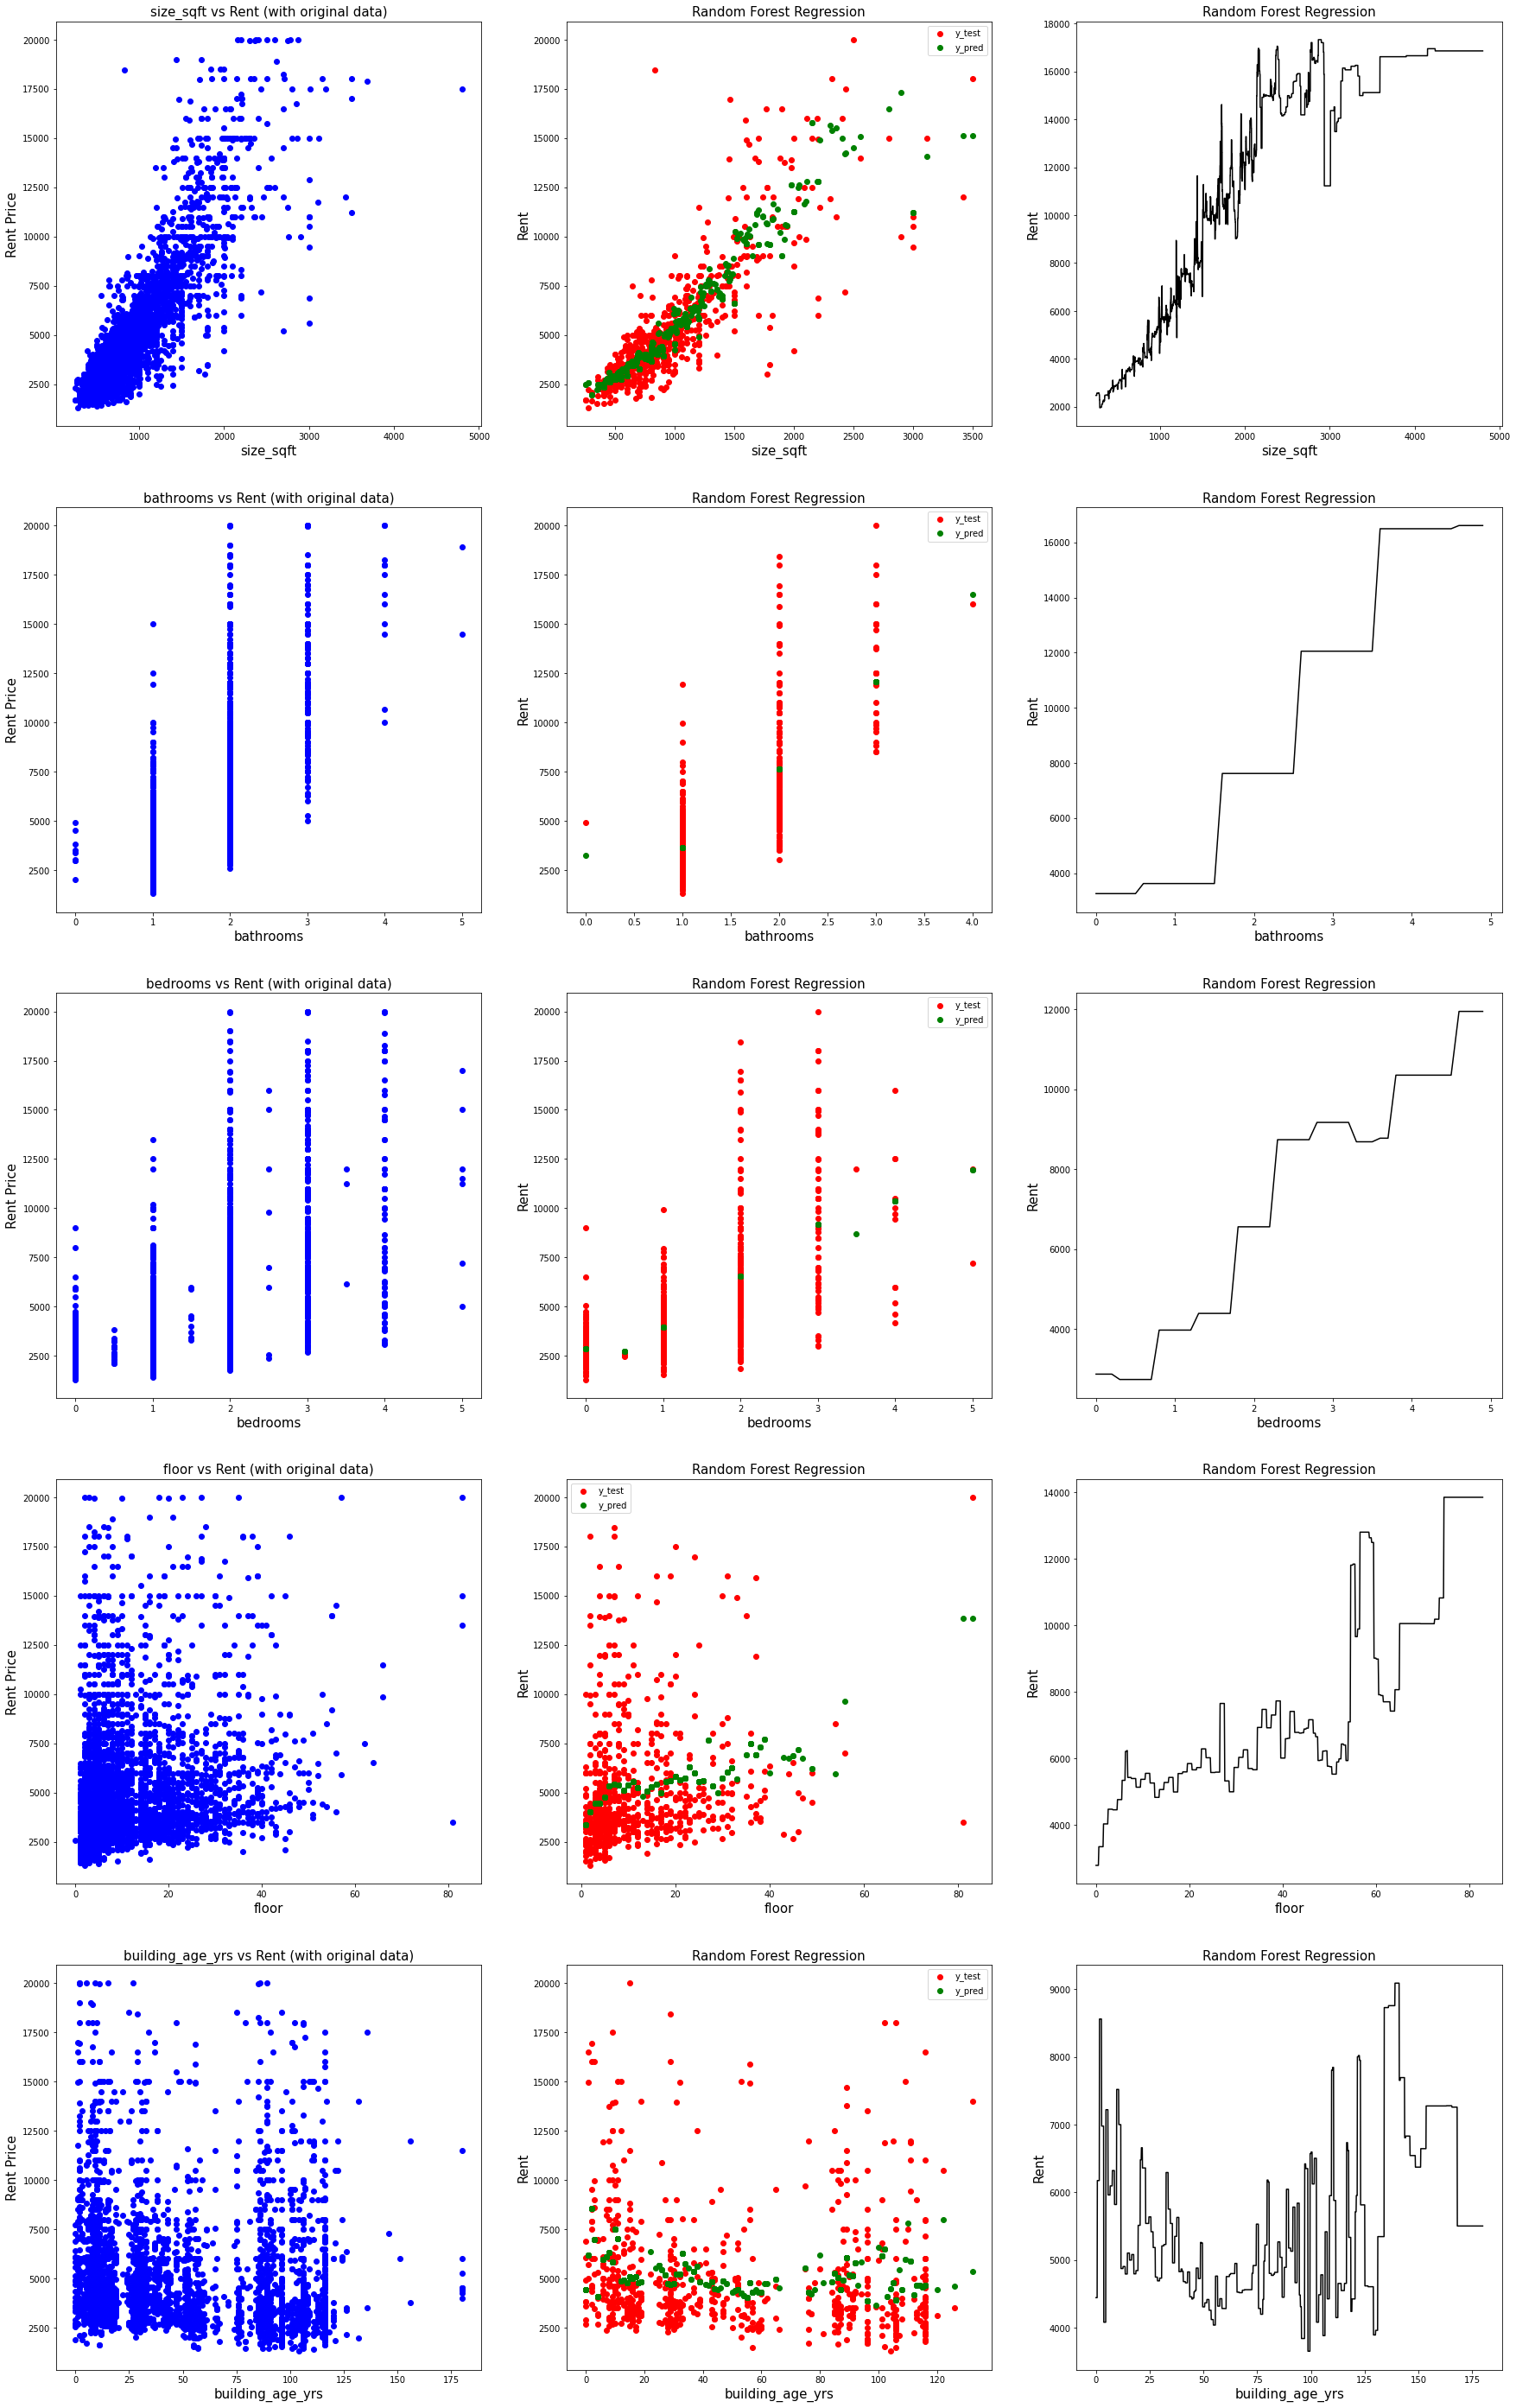

In [ ]:
# lets try this with the top 5 most correlated features with rent: size, bathroom, bedroom, floor, building age
features = ["size_sqft", "bathrooms", "bedrooms", "floor", "building_age_yrs"]

fig, ax = plt.subplots(5, 3, figsize = (30, 50))

for counter, i in enumerate(features):
    # creating a new x with just one feature
    x_feature = data[i].copy()

    # reassigning x_train and x_test values
    x_train, x_test, y_train, y_test = train_test_split(x_feature, y, train_size= 0.8, random_state=42)
    regressor.fit(np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1,1))

    y_pred = regressor.predict(np.array(x_test).reshape(-1, 1))

    # Visualising the Random Forest Regression results
  
    # Scatter plot for original data
    ax[counter, 0].scatter(x_feature, y, color = 'blue')  
    ax[counter, 0].set_xlabel(i, size = 15)
    ax[counter, 0].set_ylabel("Rent Price", size = 15)
    ax[counter, 0].set_title(i+" vs Rent (with original data)", size = 15)

    # arange for creating a range of values from min value of x to max value of x 
    # with a difference of 0.01 between two consecutive values
    X_grid = np.arange(min(x_feature), max(x_feature), 0.1) 
    
    # reshape for reshaping the data into a len(X_grid)*1 array, 
    # i.e. to make a column out of the X_grid value                  
    X_grid = X_grid.reshape((len(X_grid), 1))

    ax[counter, 1].scatter(x_test, y_test, color = 'red')
    ax[counter, 1].scatter(x_test, y_pred, color = 'green')
    ax[counter, 1].set_title('Random Forest Regression', size = 15)
    ax[counter, 1].set_xlabel(i, size = 15)
    ax[counter, 1].set_ylabel('Rent', size = 15)
    ax[counter, 1].legend(["y_test", "y_pred"])

    # plot predicted data
    ax[counter, 2].plot(X_grid, regressor.predict(X_grid), color = 'black')
    ax[counter, 2].set_title('Random Forest Regression', size = 15)
    ax[counter, 2].set_xlabel(i, size = 15)
    ax[counter, 2].set_ylabel('Rent', size = 15)


The graphs to the left demonstrate the relationship between the two features from the original dataset. <br>

The middle column shows the relationship between the values that the model predicted compare to the y test values, the red being the y_test values and the green being the predicted values. This can show us how accurate our model is. We can see that the predicted values lie closer to the middle and more clustered areas of the graph showing that they are predicting values that occur most often. <br>

The last column is the Random Forest Regression plot that displays the predictions it made. <br>

However, random forest regression isn't the best to predict unseen values aka extrapolate from data that isn't provided. Since we wanted to be able to predict the rent prices of an apartment that had features that we would provide, we also used multiple linear regression, which is also better for predicting values with multiple features.

Score: 0.7865923403878721


Text(0.5, 1.0, 'Actual Rent vs Predicted Rent')

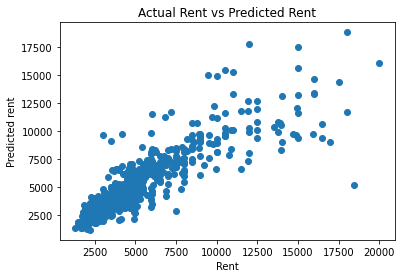

In [ ]:
x = data.drop(['rental_id', 'neighborhood', 'rent', 'borough'], axis = 1)
y = data["rent"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.8, random_state=42)

# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print("Score:", model.score(x_train, y_train))

plt.scatter(y_test, y_predict)
plt.xlabel("Rent")
plt.ylabel("Predicted rent")
plt.title("Actual Rent vs Predicted Rent")


The graph above shows the predicted rent prices and the test prices in order to display the accuracy of the model. We can see that there is a general positive linear relationship, so we can infer that the model can predict the values of the y_test, which represents the truth, with a good accuracy.

Score: 0.7861057576977293


Text(0.5, 1.0, 'Actual Rent vs Predicted Rent')

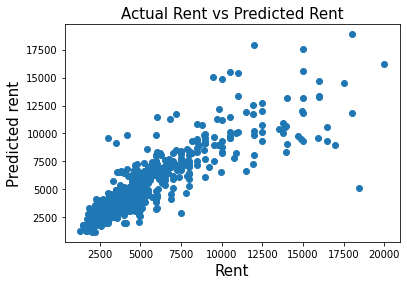

In [ ]:
# removing the less correlated features (binary attributes)

x = data.drop(['rental_id', 'neighborhood', 'rent', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'], axis = 1)
y = data["rent"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.8, random_state=42)

# linear regression
from sklearn.linear_model import LinearRegression
model_s = LinearRegression()

model_s.fit(x_train, y_train)
y_predict = model_s.predict(x_test)

print("Score:", model_s.score(x_train, y_train))

plt.scatter(y_test, y_predict)
plt.xlabel("Rent", size = 15)
plt.ylabel("Predicted rent", size = 15)
plt.title("Actual Rent vs Predicted Rent", size = 15)

After removing the less correlated features, the binary values (amenities), we actually see that the accuracy actually decreases because we lose prediction power by taking away some features. We aren't able to visually see the difference in the graphs because the difference is only about 0.0004. However, the difference is large enough so we decide to keep these features in for our final model.

Here, we are able to display a predicted rent value based on the decided features.

In [ ]:
# we can predict how much a place would be with certain values
# [[bedrooms, bathrooms, sqft, min to subway, floor, building age, 
# fee?, roofdeck?, washer and dryer?, doorman?, elevator?, dishwasher?, patio?, gym?]]
test_appartment = [[4, 2, 1000, 5, 2, 98, 0, 1, 1, 1, 1, 1, 1, 1]]
yy = model.predict(test_appartment)
print(yy)

[4662.89759157]


<h1 align=center style="background-color:lightblue;"><font size=6>Predicting Rent Based on Neighborhood</font></h1>

From earlier, we noticed that where the apartment is located plays a part in how much it would cost, so we wanted to provide a way to predict the rent of an apartment at a desired location. <br>
The code below asks the user to input a neighborhood they want to look at and it will take the neighborhood and features into consideration when it outputs the price.

In [ ]:
# can also see how the rent may change for different neighborhoods
# asks user for a specific neighborhood to examine
nh = input("Which neighborhood do you want to look at?").title()

df_nh = data.loc[data['neighborhood'] == nh, :]
x_nh = pd.DataFrame(df_nh.drop(['rental_id', 'neighborhood', 'rent', 'borough'], axis = 1))
y_nh = pd.DataFrame(df_nh["rent"])

from sklearn.model_selection import train_test_split
x_train_nh, x_test_nh, y_train_nh, y_test_nh = train_test_split(x_nh, y_nh, train_size= 0.8, random_state=42)

# linear regression
from sklearn.linear_model import LinearRegression
model_nh = LinearRegression()

model_nh.fit(x_train_nh, y_train_nh)

# we can predict how much a place would be with certain values
# [[bedrooms, bathrooms, sqft, min to subway, floor, building age, 
# fee?, roofdeck?, washer and dryer?, doorman?, elevator?, dishwasher?, patio?, gym?]]
test_appartment = [[4, 2, 1000, 5, 2, 98, 0, 1, 1, 1, 1, 1, 1, 1]]
yy = model_nh.predict(test_appartment)
formatted_float = "{:.2f}".format(yy[0][0])
print("Prediction for apartment with these features in " + nh + ": " + formatted_float)


Prediction for apartment with these features in Flatiron: 3435.18


<h1 align=center style="background-color:lightblue;"><font size=6>Conclusion</font></h1>

In this project, we explored the relationship between an apartment's features and its rent price to see which were the most important.

First, we used bar charts to visualize the distribution of rent prices across different neighborhoods. In this section, we found that average rent was highest in Soho, Tribeca, and Central Park South, respectively. The lowest average rent was found in Manhattanville, Inwood, and Little Italy, respectively. We also looked at the minimum and maximum rent in each neighborhood, concluding that Flatiron, Upper East Side, Tribeca, Soho, Midtown East, West Village and Gramercy Park were tied for the highest maximum rent while Washington Heights had the lowest minimum rent.

We used pie charts to visualize the proportion of apartments in various price categories that have or do not have certain amenities. The primary finding was that rent price had little bearing on the presence of certain amenities, although apartments with a rent price of 2500-5000 and 5000-7500 are less likely to have a management fee when compared to apartments at higher price levels.

Next, we looked at the correlation between different apartment features and rent price through the use of two different visualization methods. We looked at each apartment feature individually as a scatter plot and found that, among apartment features that did not have a binary classification, nearly all exhibited a correlation with rent price. We also used a ranked heatmap to provide a useful overview of the r-squared values of each apartment feature and rent. We found that size, number of bathrooms, and number of bathrooms had the highest r-squared values, which is fairly obvious. The apartment floor level also explains a non-trivial amount of the rent price with an r-squared value of 0.22. 

In the final component of this project, we tried to create a model to predict rent price using several different methods, including linear regression, k-nearest neighbors, and random forest regressor. The scores for the three models revealed that random forest had the highest score, or in other words, the greatest accuracy. However, we cannot use random forest because it does not allow predictions to be made on data that is unseen. Therefore, we would recommend using the linear regression model to make predictions on rent.

So, at the end, we discovered that the most impactful features on rent is the size of the apartment, number of bedrooms and bathrooms, the floor it is on, and the building's age.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b81dedaa-4400-49f1-92aa-932df996b03b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>